# Solutions to 1.E

__I urge you to try the problems yourself first before looking at solutions.__

_Note: the following solutions may be incorrect._

$$\require{mhchem}$$

In [ ]:
# %load ../src/header.py
from rdkit import Chem
from rdkit.Chem import Draw


def draw_molecule(smile):
    molecule = [Chem.MolFromSmiles(smile)]
    return Draw.MolsToGridImage(
        molecule,
        useSVG=True,
    )


def draw_molecules(smiles, names, per_row=2, size=(200, 250)):
    molecules = [Chem.MolFromSmiles(s) for s in smiles]
    return Draw.MolsToGridImage(
        molecules,
        legends=names,
        molsPerRow=per_row,
        useSVG=True,
        subImgSize=size,
    )


## 1-1

I assume there is a typo in the problem, and that the author means $\ce{C2H2Br4}$, not $\ce{CH2Br4}$.

There are two isomers:

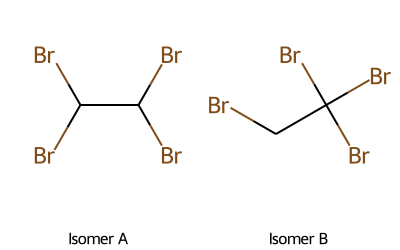

In [42]:
isomers = ['C(Br)(Br)' * 2, 'C(Br)' + 'C' + '(Br)' * 3]
draw_molecules(
    isomers,
    ['Isomer A', 'Isomer B'],
)

Suppose we have some $\ce{C2H2Br4}$, and we want to know which isomer it is using the substitution method. The key idea is to exploit the symmetry that isomer A has, but B does not. We apply a reaction that substitutes a $\ce{Br}$ with a $\ce{H}$. Then, after the substitution reaction, Isomer B will have two possible products: 1 and 2. Isomer A will only have product 2.

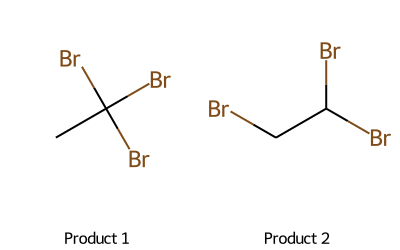

In [43]:
draw_molecules(
    ['C' + 'C' + '(Br)' * 3, 'C(Br)' + 'C' + '(Br)' * 2],
    ['Product 1', 'Product 2'],
)

## 1-2

Usually when a compound gives _only a single substance_ in the substitution method, the compound has some symmetry. The two symmetric arragements of $\ce{C3H6Br2}$ I can think of are:

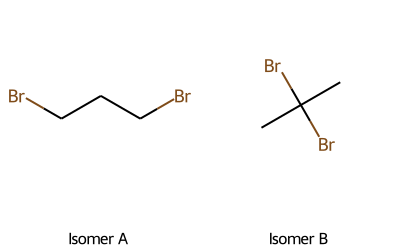

In [45]:
draw_molecules(
    ['C(Br)' + 'C' + 'C(Br)', 'C' + 'C(Br)(Br)' + 'C'],
    ['Isomer A', 'Isomer B'],
)

We are given that the product is $\ce{C3H5Br3}$, and we substituted a $\ce{H}$ with a $\ce{Br}$. If we assume that the carbons are free-rotating tetrahedral, then it is clear that we are dealing with isomer B. The structure of the subsitution product is:

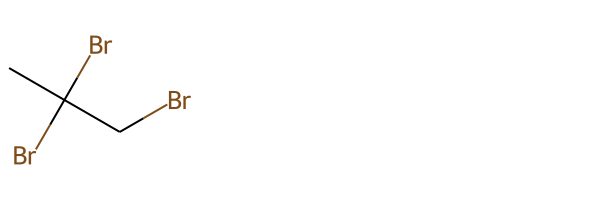

In [57]:
draw_molecule('C' + 'C(Br)(Br)' + 'C(Br)')

## 1-3

Once again, because there is only a _single_ monobromo product, we are looking for a very symmetrical isomer. This one looks good:

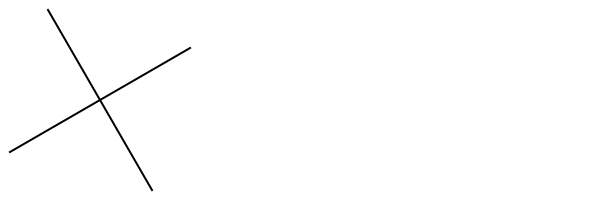

In [59]:
# neopentane
draw_molecule('C' + '(C)' * 4)

## 1-4

We're dealing with gaseous ethene ($\ce{C2H4}$) and liquid bromine. The structure of ethene is well know:

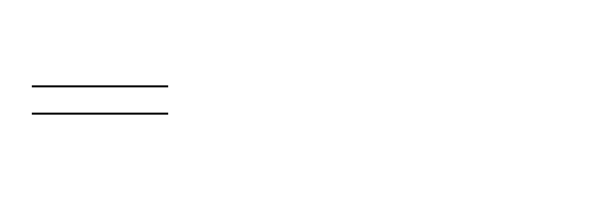

In [60]:
# ethene
draw_molecule('C=C')

The double bond of ethene becomes a single to make room for the addition of two bromine atoms. The structure of $\ce{C2H4Br2}$ is below, labeled _Initial product_.

We will once again invoke a rule of thumb: _a single substitution product implies the reactant compound has symmetry_. From this, we see the structure of $\ce{C2H3Br3}$.

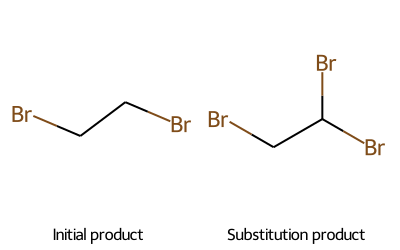

In [62]:
draw_molecules(
    ['C(Br)' * 2, 'C(Br)C(Br)(Br)'],
    ['Initial product', 'Substitution product'],
)

## 1-5

This one is pretty cool. First, I'll redraw the dibromobenzenes in the problem:

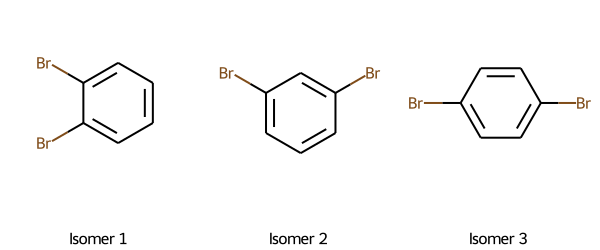

In [67]:
isomers = [
    'c1c(Br)c(Br)ccc1',
    'c1c(Br)cc(Br)cc1',
    'c1c(Br)ccc(Br)c1',
]
draw_molecules(
    isomers,
    [f'Isomer {i}' for i in range(1, len(isomers) + 1)],
    3,
)

Then, we'll draw the possible products after a substitution reaction.

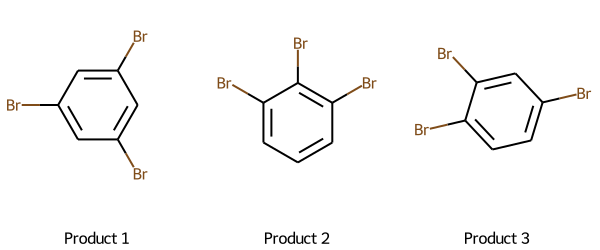

In [68]:
products = [
    'c1c(Br)cc(Br)cc1(Br)',
    'c1c(Br)c(Br)c(Br)cc1',
    'c1c(Br)c(Br)cc(Br)c1',
]
draw_molecules(
    products,
    [f'Product {i}' for i in range(1, len(products) + 1)],
    3,
)

Finally, we present an algorithm that will identify the particular isomer of $\ce{C6H4Br2}$.

### Algorithm

1. Execute a substitution test that replaces a single $\ce{H}$ with a single $\ce{Br}$.
1. Observe the product.
1. If we observe any Product 1's, we've found it. It's __Isomer 2__.
    1. Note that Isomer 2 is the only one capable of becoming Product 1.
    1. Otherwise, continue observing with the assumption that it is _not_ Isomer 2.
1. If we observe any Product 2's, we've found it. It's __Isomer 1__.
    1. Note that only Isomers 1 and 2 can become Product 2.
    1. Otherwise, continue observing with the assumption that is it _not_ Isomer 2 and _not_ Isomer 1.
1. By process of elimination, it has to be __Isomer 3__. We should only see Product 3's.

## 1-6

Under Ladenburg's suggestion, benzene would have the following attributes:

| _x_ | Number of _x_-bromine-substitued isomers |
| ----: | :---- |
| mono | 1 |
| di | 1 + 3 |
| tri | 1 + 3 |

With Kekule's idea:

| _x_ | Number of _x_-bromine-substitued isomers |
| ----: | :---- |
| mono | 1 |
| di | 3 |
| tri | 1 + 1 + 1 |

The difference in numbers comes from the fact that Ladenburg's prismatic benzene is "3D by nature", while Kekule's benzene is planar or essentially "2D by nature". The prismatic benzene has more degrees of rotation to play around with, thereby generating more isomers.